In [6]:
import numpy as np
from qiskit import *
from qiskit import Aer
%matplotlib inline

In [2]:
circ = QuantumCircuit(3)

In [3]:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

In [4]:
circ.draw()

In [7]:
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw()

In [8]:
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [9]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 502, '111': 522}


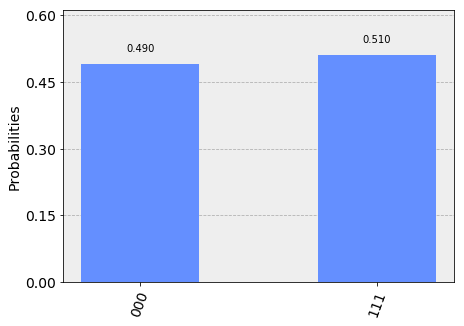

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)